In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3))

In [ ]:
n_agents = 1
vision = 3
filepath = None
n_episodes =10000
update_factor = 100
len_game = 1000
lr = 1e-3
train = trainer.Maze_Training('test',dataset,len_game,n_agents,vision,n_episodes = n_episodes,lr = lr,update_factor=update_factor)
train.train(lambda_entropy=0.5)
train.save()

episode 0
cumulative reward: [92.0]


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


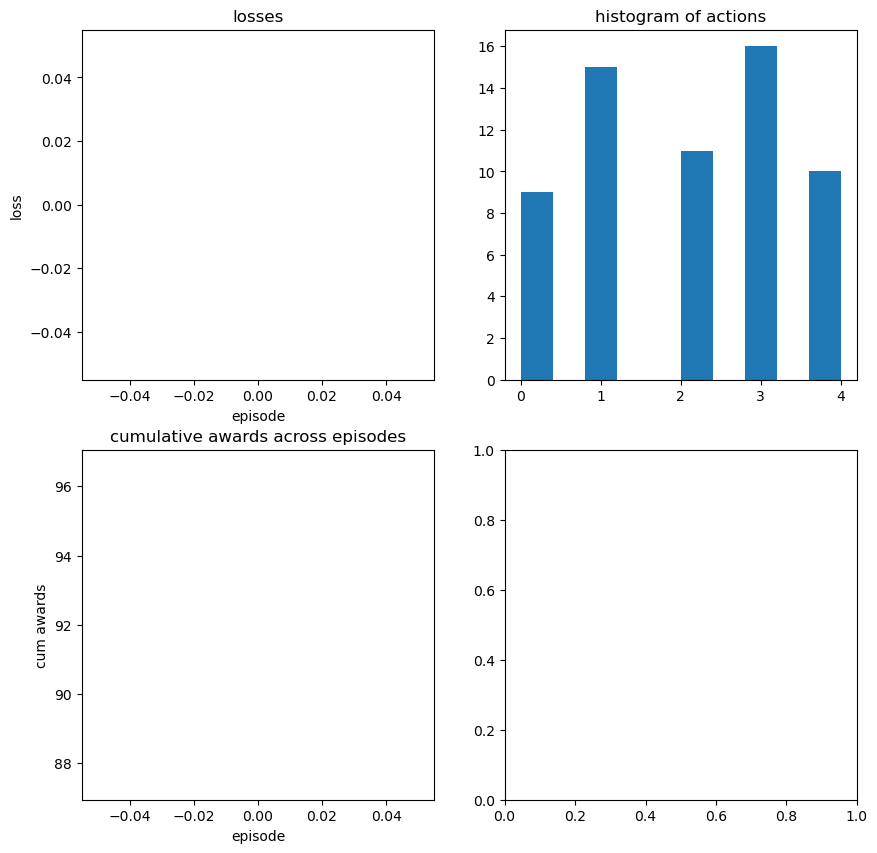

In [4]:
train.results()

In [5]:
train.agents.run_agent(1,dataset.__getitem__(0),epsilon=0,sample_prob=True)


AttributeError: 'int' object has no attribute 'grid_shape'